# 21M.387 Fundamentals of Music Processing
## Fourier Transform, part 1

In this lecture, we describe the Fourier Transform, one of the most powerful and ubiquitous tools in audio signal processing. We'll focus on the Discrete Fourier Transform (DFT), where "input" to the DFT is a sampled time signal, and the "output" of the DFT is a set of discrete (ie, sampled) frequencies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp

plt.rcParams['figure.figsize'] = (12, 4)
fmp.documentation_button()

## Reading

Chapter 2.0 - 2.1.3 (pp 39 – 53)

<img src="images/book_cover.png" width=200>

Also really useful:

<img src="images/MDFT.jpg" width=200>

The text of the book can be found here:
https://ccrma.stanford.edu/~jos/mdft/

## What the DFT Does

Start with a sampled signal (ie, time series) of finite length.  
The DFT will "extract" the frequency components that make up that signal.

Here are a few examples:

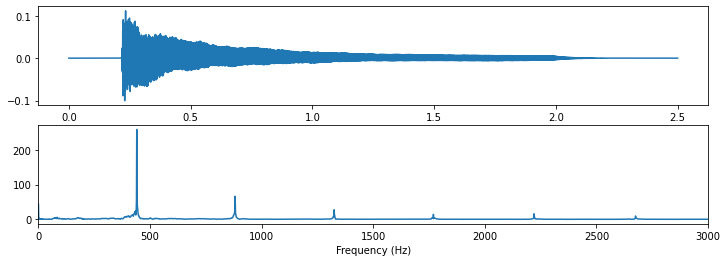

In [2]:
fmp.plot_fft_and_listen('audio/pianoA4.wav')

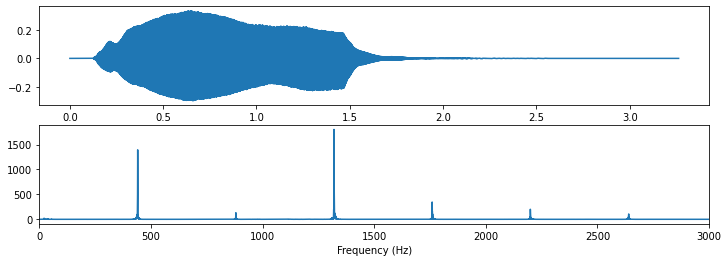

In [3]:
fmp.plot_fft_and_listen('audio/clarinetA4.wav')

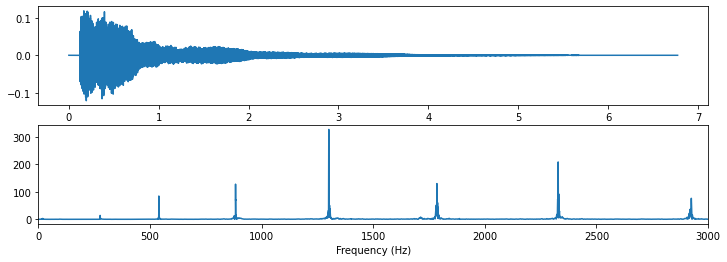

In [4]:
fmp.plot_fft_and_listen('audio/tubularA4.wav')

We'll call our signal $x[n]$.  
In the above examples, the sampling rate is $F_s = 22050$.  

## The Discrete Fourier Transform

The equation for the DFT is:

$$X[k] = \sum_{n=0}^{N-1}x[n]e^{-j 2 \pi kn / N } \text{, for } k \in [0:N-1]$$

- $X[k]$ is the DFT of $x[n]$, sometimes called the _spectrum_ of $x[n]$. 
- We use a _lower case_ $x[n]$ for the time-series and a _capital_ $X[k]$ for the spectrum.
- $N$ is the length of the DFT, which is also the length of the input signal $x[n]$.
- The argument $k$ takes the role of _frequency_, but is a _frequency index_ (sometimes knows as a _frequency bin_).
- The DFT's output is a set of $N$ complex numbers (evaluated at $k \in [0, N-1]$).
- the frequency corresponding to $k$ is $f_k = k {F_s \over N}$

<font color='red'>__Whiteboard__</font>: DFT

The rest of this lecture will describe how the DFT works.

But first, a few more examples.

55125 22050 1101
440.4 Hz


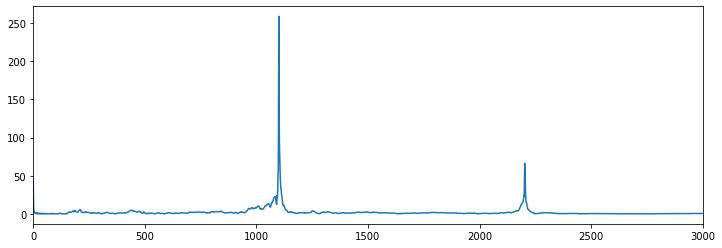

In [5]:
# [livecode]
x = fmp.load_wav('audio/pianoA4.wav')
N = len(x)

# use np.fft.fft to find the DFT (FFT = fast fourier transform)
X = np.abs(np.fft.fft(x))
plt.plot(X)
plt.xlim(0, 3000)

k = fmp.find_peaks(X, .25)[0]

fs = 22050

print(N, fs, k)
freq = k * fs / N
print(f'{freq} Hz')

Audio with multiple notes of a piano (C major triad)

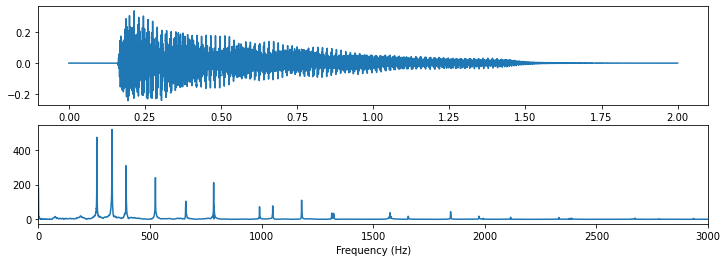

In [6]:
fmp.plot_fft_and_listen('audio/pianoCEG.wav')

This time, the notes of the triad are separated in time. Note what happens in the DFT.

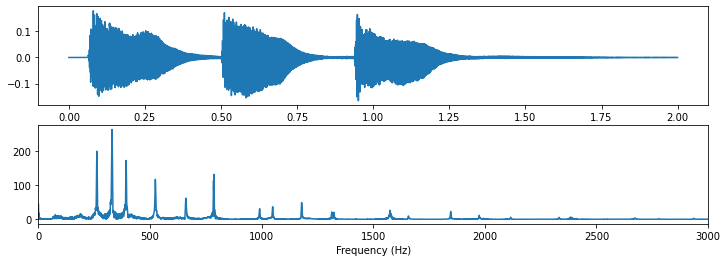

In [7]:
fmp.plot_fft_and_listen('audio/piano_arpeg.wav')

## The Sinusoid

The basic sinusoid has either of the following equations:  
$$x(t) = A \sin(\omega t + \phi)$$
or
$$x(t) = A \cos(\omega t + \phi)$$

- $\omega$ is the _angular velocity_.
- $\phi \in [- \pi, \pi)$ is the _phase_.
- $A$ is the amplitude of the sinusoid.

All sinusoids are uniquely defined by this parameter set: $\{A, \omega, \phi \}$.  

We write $\omega = 2 \pi f$ where $f$ is the _frequency_ in units of Hertz (Hz). 

Note that the textbook uses $\omega$ to mean _frequency_ (in Hz), and $\phi$ to mean _unit phase_, $\phi \in [0,1)$. Sometimes the sign of $\phi$ is flipped, so instead you will see:
$$ x(t) = A \sin(2 \pi (\omega t - \phi)) $$


Be careful about possible confusion here. I will use the first definition.

## Discrete Time Sinusoid

Going forward, all signals we analyze will be:
- sampled, indexed by $n$
- of length $N$

The sampling rate $F_s$ will not figure into the equations. $F_s$ only matters for interpreting what $k$ means.  
Remember that $f = k {F_s \over N}$

Lets sample the basic sinusoid at period $T = {1 \over F_s}$. In other words, we take a sample at every $t = nT$.

$
\begin{align}
x(t) & = A \cos(\omega t + \phi) \\
x[n] & = A \cos(\omega nT + \phi) \\
     & = A \cos(2 \pi f nT + \phi) \\
     & = A \cos(2 \pi k {F_s \over N} nT + \phi) \\
     & = A \cos(2 \pi {k \over N} n + \phi) \\
\end{align}
$

So we now characterize a DT sinusoid with parameters $\{A, k, \phi\}$

<font color='red'>__Whiteboard__</font>: Discrete Time (Sampled) Sinusoid


In [8]:
# helper functions:
def make_cosine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.cos( 2 * np.pi * k / N * n + ph)

def make_sine(a, k, ph, N) :
    n = np.arange(N)
    return a * np.sin( 2 * np.pi * k / N * n + ph)

Visualizing the DT sinusoid with $N=100$

In [9]:
N = 100
@interact( a=fmp.slider(0.5, 3., 1), k=fmp.slider(1, 10., 1), ph=fmp.slider(-np.pi, np.pi, 0))
def plot_cosine(a, k, ph) :
    x = make_cosine(a, k, ph, N)
    plt.figure()
    plt.plot(x, 'ro')
    plt.ylim(-3, 3)
    plt.xlabel('n')
    plt.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a', max=3.0, min=0.5), Floa…

Let's look at the full range of $k$, including negative numbers for $N=20$

In [10]:
N = 20
@interact( k=fmp.slider(-10, 20, 1), ph=fmp.slider(-np.pi, np.pi))
def plot_cosine(k, ph = 0) :
    x = make_cosine(1, k, ph, N)
    f = np.cos(np.linspace(0,2*np.pi*k, 200, endpoint=False) + ph)
    plt.figure()
    plt.plot(np.linspace(0, N, 200, endpoint=False), f)
    plt.stem(x, markerfmt='ro')
    plt.ylim(-1.5, 1.5)
    plt.xlabel('n')
    plt.show()

interactive(children=(IntSlider(value=1, continuous_update=False, description='k', max=20, min=-10), FloatSlid…

## Sum of Sinusoid

__Any arbitrary signal__ $x[n])$ can be represented by adding together a particular mix of sinusoids.

As a small example, we create funky-shaped $x[n]$, by adding the following sinusoids:
- $\{A=1.0, k=1, \phi=0 \}$
- $\{A=0.6, k=3, \phi=2.1 \}$
- $\{A=0.4, k=8, \phi=0.6 \}$

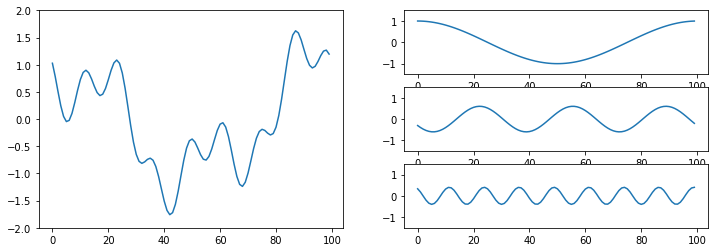

In [11]:
N = 100
c1 = make_cosine(1.0, 1, 0, N)
c2 = make_cosine(0.6, 3, 2.1, N)
c3 = make_cosine(0.4, 8, 0.6, N)
funky_x = c1 + c2 + c3

plt.figure()
plt.subplot(1,2,1)
plt.plot(funky_x)
plt.ylim(-2, 2)

for i, c in enumerate((c1, c2, c3)):
  plt.subplot(3, 2, 2*i+2)
  plt.plot(c)
  plt.ylim(-1.5, 1.5)

The DFT lets us "interrogate" $x[n]$ to recover its pure sinusoid components. The numpy function `numpy.fft.fft(x)` returns the DFT of `x`. 

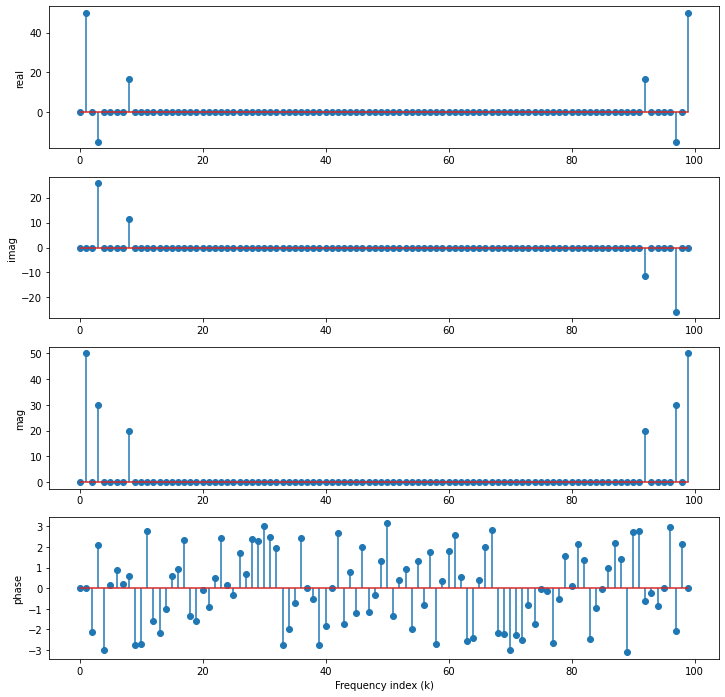

In [12]:
dft = np.fft.fft(funky_x)

dft_mag = np.abs(dft)
dft_ph  = np.angle(dft)
# dft_ph[dft_mag < 0.0001] = 0 # squash values with 0 magnitude 

plt.figure(figsize=(12,12))
plt.subplot(4,1,1)
plt.stem(dft.real)
plt.ylabel('real')
plt.subplot(4,1,2)
plt.stem(dft.imag)
plt.ylabel('imag')
plt.subplot(4,1,3)
plt.stem(dft_mag)
plt.ylabel('mag')
plt.subplot(4,1,4)
plt.stem(dft_ph)
plt.ylabel('phase')
plt.xlabel('Frequency index (k)');

- Spectrum $X[k]$ is symmetric around $k = N/2$.
- Re$\{X[k]\}$ and Im$\{X[k]\}$ are not that useful.
- $\lvert X[k]\lvert$ looks promising.
- $\angle X[k]$ is only meaningful for $k$ when $\lvert X[k]\lvert \gt \epsilon$

### Recovering $A$, $\phi$, and $f$

To recover $A$ and $\phi$ for a given $k$:

$$A = {1 \over N} (\lvert X[k]\lvert + \lvert X[-k] \lvert) = {2 \over N} \lvert X[k]\lvert $$
$$ \phi = \angle X[k]$$

- $X$ is cyclical: $X[-k] = X[N-k]$
- When $x[n]$ is a _real_ function, $\lvert X \lvert$ has even symmetry so $\lvert X[k] \lvert = \lvert X[-k] \lvert$

In [13]:
for k in (1,3,8, 10):
    mag = dft_mag[k]
    a = 2 * dft_mag[k] / N
    phi = dft_ph[k]
    print(f'k = {k}: mag(X) = {mag:.2f}. A = {a:.2f}. phase(X) = {phi:.2f}')

k = 1: mag(X) = 50.00. A = 1.00. phase(X) = 0.00
k = 3: mag(X) = 30.00. A = 0.60. phase(X) = 2.10
k = 8: mag(X) = 20.00. A = 0.40. phase(X) = 0.60
k = 10: mag(X) = 0.00. A = 0.00. phase(X) = -2.71


## Arriving at the DFT

- Dot Product
- Orthogonality of Sinusoids
- Sinusoid Probes
- Sinusoid Quadrature Phase
- Two Sinusoid Probes
- Complex Notation

### Dot Product

The _dot product_ or _inner product_ is a mathematical operation on 2 vectors of the same length:

$\langle x, s \rangle = \sum_{n=0}^{N-1}x[n] \cdot s[n]$

$x[n], n \in [0, N-1]$ or $x \in \Bbb R^N$  
$s[n], n \in [0, N-1]$ or $s \in \Bbb R^N$  

Take two signals. Multiply the elements. Add the result together to get one _scalar value_.

Even though $x[n]$ is a time series, you can think of it as a single vector in an $N$ dimensional space. Or: $x \in \Bbb R^N$

The intuition behind $\langle x, s \rangle$ is "how much of $s$ is in $x$" or "how much do $s$ and $x$ have in common"?

The actual formula for projection (how much of $s$ is in $x$) is given by:  
$$\alpha = {\langle x, s \rangle \over \Vert s \Vert}$$
$\alpha$ is the _coefficient of projection_ when determining the projection of $x$ onto $s$.

If $x$ and $s$ are _orthogonal_ ($x \perp s$) then the dot product is zero: $\langle x, s \rangle = 0$.

<font color='red'>__Whiteboard__</font>: Dot Product

In [14]:
# Example:

x = np.array((1,5,4))
s = np.array((-.6,0,.8))

print('x = ', x)
print('s = ', s)

print('method 1: <x,s> = ', np.sum(x * s))
print('method 2: <x,s> = ', np.dot(x, s))

x =  [1 5 4]
s =  [-0.6  0.   0.8]
method 1: <x,s> =  2.6
method 2: <x,s> =  2.6


###  Orthogonality of Sinusoids

Let's find the dot product of two sinusoids of length $N$:  
$x_1[n] = \{ A_1, k_1, \phi_1 \}$  
$x_2[n] = \{ A_2, k_2, \phi_2 \}$  
where $k_1, k_2$ are integers.

If $k_1 \neq k_2$, the two sinusoids are _orthogonal_, and $\langle x_1, x_2 \rangle = 0$.

In [15]:
@interact( k1=(1, 10), k2 = (1,10), ph2 = fmp.slider(0, 3.14, 0) )
def sinusoid_dot_product(k1=2, k2=3, ph2=0) :
    N = 100
    x1 = make_cosine(1, k1, 0, N)
    x2 = make_cosine(1, k2, ph2, N)
    x1x2 = x1 * x2
    dp = np.sum(x1x2)
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(x1)
    plt.plot(x2)
    plt.subplot(2,1,2)
    plt.plot(x1x2, 'r')
    plt.ylim(-1,1)
    plt.ylabel('$x_1 \cdot x_2$')
    plt.xlabel('n')
    plt.text(70, 0.7, f'< x1 , x2 > = {dp:.2f}', size=15)
    plt.grid()
    plt.show()

interactive(children=(IntSlider(value=2, description='k1', max=10, min=1), IntSlider(value=3, description='k2'…

### Sinusoid Probes

We can use the orthogonality principle to extract $A$ and $\phi$ at a given $k$ using the dot product!

To find out if $x[n]$ has a sinusoid with frequency $k$:
- create a "prototype" or "probe" function: $s_{k,\phi}[n] = \cos(2\pi kn/N + \phi)$
- take the dot product $\langle x, s_{k,\phi} \rangle$
- try all values of $\phi$ until we get the best (highest) amount.

Example: $x[n] = 4 \cos(2\pi 9n/N + 0.7) \rightarrow \{A = 4, k = 9, \phi=0.7\}$

- If the $k$'s don't match, $\langle x, s_{k,\phi} \rangle = 0$.
- If the $k$'s do match, $\langle x, s_{k,\phi} \rangle$ depends on $\phi$.

In [16]:
# try with a single sinusoid
x = make_cosine(4, 9, 0.7, 100)

# also try funky_x
# x = funky_x

@interact( k_s=(0,15), phi_s=fmp.slider(-1.0, 3.0, 0) )
def probe_test(k_s=0, phi_s=0) :
    N = len(x)
    s = make_cosine(1, k_s, phi_s, N)
    amount = np.dot( x , s )
    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    plt.plot(x)
    plt.plot(s)
    plt.legend(('signal', 'probe'), loc='upper right')

    plt.subplot(2,1,2)
    plt.plot(x * s, 'r')
    plt.ylim(-4,4)
    plt.xlabel('n')
    plt.grid()
    txt = f'$<x,s_k> = {amount:.2f}$' % amount
    plt.text(70, 2.5, txt, size=20, bbox=dict(fc='white'))
    plt.show()

interactive(children=(IntSlider(value=0, description='k_s', max=15), FloatSlider(value=0.0, continuous_update=…

How do we "recover" $A$ and $\phi$?

$$ \phi^* = \underset{\phi}{\operatorname{arg max}} \langle x, s_{k,\phi} \rangle  $$

$$ A = {\frac 2 N} \langle x, s_{k,\phi^*} \rangle $$


This works and will produce the DFT, but is a rather silly approach.

###  Sinusoid Quadrature Phase

Remember this trig identity?

$$\cos(\alpha+\beta) = \cos(\alpha) \cos(\beta) - \sin(\alpha) \sin(\beta)$$

Let's apply this rule to our sinusoid $ x[n] = \{ A, k, \phi \} = A \cos(2 \pi {k \over N} n + \phi)$

and to save ink, define $ \omega_k = 2 \pi {k \over N} $

$$
\begin{align}
x[n] & = A \cos(\omega_k n + \phi) \\
     & = A \cos(\omega_k n) \cos(\phi) - A \sin(\omega_k n) \sin(\phi) \\
     & = A_1 \cos(\omega_k n) - A_2 \sin(\omega_k n) \\
\end{align}
$$

where 

$$A_1 = A\cos(\phi)$$
$$A_2 = A\sin(\phi)$$

Any sinusoid (with arbitrary phase) can be expressed as the sum of two properly weighted _quadrature-phased_ sinusoids (i.e, separated by $90°$).

In other words, the original amplitude and phase $\{A, \phi\}$ can be represented by two amplitudes $\{A_1, A_2\}$.

Or, going the other way:
$$A = \sqrt{A_1^2 + A_2^2}$$
$$\phi = \arctan(A_2, A_1)$$ 

<font color='red'>__Whiteboard__</font>: Quadrature Phase

Here is an example of this working (with $k=4$):

In [17]:
@interact( a=fmp.slider(1., 2.), phi = fmp.slider(0, 2 * np.pi) )
def quadrature(a=1, phi = 0) :
    k = 4
    N = 100
    # compute A_1 and A_2
    a1 = a * np.cos(phi)
    a2 = a * np.sin(phi)
    
    # create the cosine and sine based on A_1 and A_2
    s1 = make_cosine(a1, k, 0, N)
    s2 = - make_sine(a2, k, 0, N)
    
    # s1 + s2:
    x = s1 + s2
    
    plt.figure()
    plt.subplot(2,1,2)
    plt.plot(s1)
    plt.plot(s2)
    plt.ylim(-2, 2)
    plt.legend((f'${a1:.2f}\cos(\omega_k n)$', f'${-a2:.2f}\sin(\omega_k n)$'), loc='upper right')

    plt.subplot(2,1,1)
    plt.plot(x, 'r')
    plt.ylim(-2, 2)
    
    plt.ylabel('$s_1 + s_2$')
    plt.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='a', max=2.0, min=1.0), Floa…

### Two Sinusoid Probes

The innovation is to use the quadrature trick in reverse.

Instead of testing $x[n]$ with the single probe $s_{k, \phi}[n] = \cos(2\pi kn/N + \phi)$, we create TWO __zero-phase__ quadrature probes:

$$s_{1k}[n] = \cos(2\pi kn/N) = \cos(\omega_k n) $$
and
$$s_{2k}[n] = -\sin(2\pi kn/N) = -\sin(\omega_k n) $$

So we run two tests:
- $S_1 = \langle x, s_{1k} \rangle$
- $S_2 = \langle x, s_{2k} \rangle$

$S_1$ is "how much cosine of frequency $k$ is in $x[n]$".  
$S_2$ is "how much (negative) sine of frequency $k$ is in $x[n]$".  

To see why this works, say our signal has just one sinusoid: $x[n] = A \cos(\omega_k n + \phi)$

By quadrature phase, the signal can be written: $x[n] = A_1 \cos(\omega_k n) - A_2 \sin(\omega_k n)$

Apply the first probe:

$$ S_1 = \langle x, s_{1k}\rangle = \sum (A_1 \cos(\omega_k n) - A_2 \sin(\omega_k n)) \cos(\omega_k n)$$

But sine and cosine are orthogonal, so we simplify
$$ S_1 = \sum A_1 \cos(\omega_k n) \cos(\omega_k n) =  \sum A_1 \cos^2(\omega_k n)$$

And because  $ \sum_{n=0}^{N-1} \cos^2(\omega_k n) = N / 2 $ (for any value of $k$... not proven here, but it is!)

We get:
$$ S_1 = {N \over 2} A_1 $$

The same idea holds for $S_2$, so we have:

- $A_1 = {2 \over N} S_1$
- $A_2 = {2 \over N} S_2$

With these two numbers, we can reconstruct the parameters $ \{ A, \phi \}$ for the $k$-sinusoid in $x[n]$:
$$A = \sqrt{A_1^2 + A_2^2} = {2 \over N} \sqrt{S_1^2 + S_2^2} $$
$$\phi = \arctan(A_2, A_1)$$

And this helps explain where that $2/N$ factor came from in our earlier observations.


An example:

In [18]:
x = make_cosine(4, 9, 0.7, 100)

# also try funky_x
# x = funky_x

@interact( k=(0,15) )
def probe_test(k=0) :
    N = len(x)
    s1 = make_cosine(1, k, 0, N) # probe 1
    s2 = make_sine(-1, k, 0, N)  # probe 2
    a1 = np.dot( x , s1 )        # dot product 1
    a2 = np.dot( x , s2 )        # dot product 2

    A = 2 / N * ((a1**2 + a2**2)**0.5)
    phi = np.arctan2(a2, a1)

    plt.figure(figsize=(10,6))
    plt.subplot(2,2,1)
    plt.title('probe 1')
    plt.plot(x)
    plt.plot(s1)
    plt.legend(('signal', 'probe $s_{1k}$'), loc='upper right')

    plt.subplot(2,2,3)
    plt.plot(x * s1, 'r')
    plt.ylim(-4,4)
    plt.grid()
    txt = f'$S1 = <x,s_{{{"1k"}}}> = {a1:.2f}$'
    plt.text(40, -3, txt, size=12, bbox=dict(fc='white'))
    
    plt.subplot(2,2,2)
    plt.title('probe 2')
    plt.plot(x)
    plt.plot(s2)
    plt.legend(('signal', 'probe $s_{2k}$'), loc='upper right')

    plt.subplot(2,2,4)
    plt.plot(x * s2, 'r')
    plt.ylim(-4,4)
    plt.grid()
    txt = f'$S2 = <x,s_{{{"2k"}}}> = {a2:.2f}$'
    plt.text(40, -3, txt, size=12, bbox=dict(fc='white'))    
    
    txt = '$\sqrt{S_1^2 + S_2^2}=%.2f$\n$A = %.2f$\n$\phi = %.2f$' % (((a1**2 + a2**2)**0.5), A, phi)
    plt.text(-30,-10,txt, size=17, bbox=dict(fc='white'))
    plt.show()

interactive(children=(IntSlider(value=0, description='k', max=15), Output()), _dom_classes=('widget-interact',…

### Complex Notation

Our test probes for a particular $k$ are:
- $s_{1k}[n] = \cos(2\pi kn/N)$.
- $s_{2k}[n] = -\sin(2\pi kn/N)$.

The tests we run are:
- $S_1 = \langle x, s_{1k} \rangle$
- $S_2 = \langle x, s_{2k} \rangle$

We now treat $s_{1k}$ and $s_{2k}$ as the _real_ and _imaginary_ parts of a single _complex_ probe:

$$ s_k[n] = s_{1k}[n] + j s_{2k}[n] $$

The two probe dot products become a single dot product:

$$ \langle x, s_{1k} \rangle + j \langle x, s_{2k} \rangle = \langle x, s_{1k} + j s_{2k} \rangle = \langle x, s_k \rangle $$

Remember Euler's formula?

$$ e^{j\theta} = \cos(\theta) + j \sin(\theta) $$

$
\begin{align}
s_k[n] & = s_{1k}[n] + j s_{2k}[n] \\
     & = \cos(2\pi kn / N) - j\sin(2\pi kn/N) \\
     & = \cos( - 2\pi kn / N) + j\sin( - 2\pi kn/N) \\
     & = e^{-j 2\pi kn / N} \\
\end{align}
$ 

So, our single complex probe is:
     $$ s_k[n] = e^{-j 2\pi kn / N} $$

<font color='red'>__Whiteboard__</font>: Euler Formula


### Back to the Discrete Fourier Transform

We are basically there. The DFT _is_ the dot product of $x$ and the complex probe $s_k$.

DFT$(x) = X[k] = \langle x, s_k \rangle$, where $X[k]$ is the complex number $S_1 + jS_2$ at $k$.

To get the familiar formula, just write out the dot product as a sum:

$
\begin{align}
X[k] &= \langle x, s_k \rangle \\
     &= \sum_{n=0}^{N-1} x[n] \cdot s_k[n]  \\
     &= \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N}  \\
\end{align}
$

Now we just need to evalute $X[k]$ for $k \in [0, N-1]$.